<a href="https://colab.research.google.com/github/jieun0441/Stimulus-Payment/blob/main/Graph_based_on_simulation_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# For Colab Use
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Package loading
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
#df = pd.read_excel("/content/drive/MyDrive/SP/Simulation results_several scenarios.xlsx", sheet_name = "Sheet1")
df_cumul = pd.read_excel("/content/drive/MyDrive/SP/Simulation_1122/Simulation results_several scenarios.xlsx", sheet_name = "Cumul")

In [ ]:
df_inf = pd.read_excel("/content/drive/MyDrive/SP/gu14 and gu11.xlsx")
df_inf

,week,Group14,Group11
0,5,4,0
1,6,1,2
2,7,12,7
3,8,29,26
4,9,13,17
5,10,55,68
6,11,38,37
7,12,58,24
8,13,71,56
9,14,33,13


In [ ]:
df_inf.columns

Index(['week', 'Group14', 'Group11'], dtype='object')

In [ ]:
df_cumul.columns

Index(['Unnamed: 0', 'Week', 'Predicted with Restriction Scenario',
       'Real Cases with Geographic Restrictions',
       'Without Geographic Restrictions_Lower Bound1017_20',
       'Without Geographic Restrictions_Lower Bound19',
       'Without Geographic Restrictions_Upper Bound19', 'Lockdown Scenario',
       'Dis1017_some', 'Dis1017_some_realNS', 'ratio19_withoutR'],
      dtype='object')

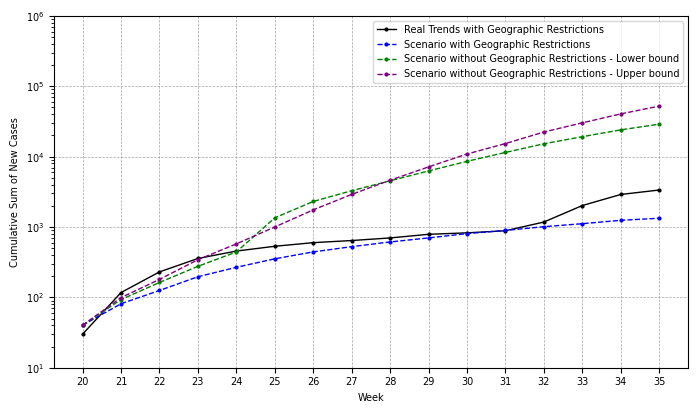

In [ ]:
#@title Graph of simulation_11/22
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Merge the two dataframes on the 'Week' column
plt.figure(figsize=(7.08, 4.23))  # Maximum width of 180 mm converted to inches
plt.plot(df_cumul['Week'], df_cumul['Real Cases with Geographic Restrictions'], marker='o', markersize=2, color='black', linestyle='-', linewidth=1, label='Real Trends with Geographic Restrictions')
plt.plot(df_cumul['Week'], df_cumul['Predicted with Restriction Scenario'], marker='o', markersize=2, color='blue', linestyle='dashed',linewidth=1, label='Scenario with Geographic Restrictions')
plt.plot(df_cumul['Week'], df_cumul['ratio19_withoutR'], linestyle='dashed',linewidth=1, marker='o', markersize=2, color='green', label='Scenario without Geographic Restrictions - Lower bound')
plt.plot(df_cumul['Week'], df_cumul['Without Geographic Restrictions_Upper Bound19'], linestyle='dashed',linewidth=1, marker='o', color='purple', markersize=2, label='Scenario without Geographic Restrictions - Upper bound')
plt.xlabel('Week', fontsize=7, fontname='DejaVu Sans')  # Using 5-7 pt san serif font
plt.ylabel('Cumulative Sum of New Cases', fontsize=7, fontname='DejaVu Sans')  # Using 5-7 pt san serif font
#plt.title('Cumulative Sum of New Cases with vs without Geographic Restrictions', fontsize=7, fontname='DejaVu Sans')

plt.yscale('log')  # Set y-axis to logarithmic scale
plt.yticks([10, 100, 1000, 10000, 100000, 1000000], fontsize=7)  # Set custom y-axis ticks

# Generate Week numbers at 1-Week intervals
Week_numbers = df_cumul['Week']

plt.xticks(ticks=Week_numbers,fontsize=7, fontname='DejaVu Sans')  # Using 5-7 pt sans-serif font (DejaVu Sans'
plt.legend(prop={'size': 7, 'family': 'DejaVu Sans'})  # Using 5-7 pt sans-serif font (DejaVu Sans' for legend

# Create the grid for vertical lines
plt.grid(True, axis='x', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add horizontal grid lines only at 10^x intervals
ax = plt.gca()
ax.grid(True, which='major', axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)


# Adjust layout
plt.tight_layout()

# Save the plot as a JPEG file with 300 DPI
plt.savefig('/content/drive/MyDrive/SP/plot_graph_20241122.jpg', dpi=600)

# Save the plot as a SVG file (vector graphic)
plt.savefig('/content/drive/MyDrive/SP/plot_graph_20241122.svg')

# Save the plot as a PDF file (vector graphic)
plt.savefig('/content/drive/MyDrive/SP/plot_graph_20241122.pdf')

# Show the plot
plt.show()

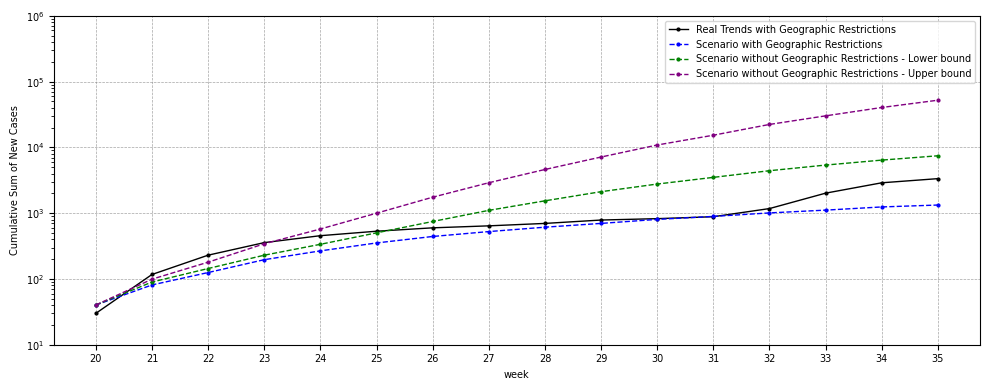

In [ ]:
#@title Graph of simulation
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Merge the two dataframes on the 'Week' column
plt.figure(figsize=(10,4))  # Maximum width of 180 mm converted to inches
plt.plot(df_cumul['week'], df_cumul['Real Cases with Geographic Restrictions'], marker='o', markersize=2, color='black', linestyle='-', linewidth=1, label='Real Trends with Geographic Restrictions')
plt.plot(df_cumul['week'], df_cumul['Predicted with Restriction Scenario'], marker='o', markersize=2, color='blue', linestyle='dashed',linewidth=1, label='Scenario with Geographic Restrictions')
plt.plot(df_cumul['week'], df_cumul['Without Geographic Restrictions_Lower Bound19'], linestyle='dashed',linewidth=1, marker='o', markersize=2, color='green', label='Scenario without Geographic Restrictions - Lower bound')
plt.plot(df_cumul['week'], df_cumul['Without Geographic Restrictions_Upper Bound19'], linestyle='dashed',linewidth=1, marker='o', color='purple', markersize=2, label='Scenario without Geographic Restrictions - Upper bound')
plt.xlabel('week', fontsize=7, fontname='DejaVu Sans')  # Using 5-7 pt san serif font
plt.ylabel('Cumulative Sum of New Cases', fontsize=7, fontname='DejaVu Sans')  # Using 5-7 pt san serif font
#plt.title('Cumulative Sum of New Cases with vs without Geographic Restrictions', fontsize=7, fontname='DejaVu Sans')

plt.yscale('log')  # Set y-axis to logarithmic scale
plt.yticks([10, 100, 1000, 10000, 100000, 1000000], fontsize=7)  # Set custom y-axis ticks

# Generate week numbers at 1-week intervals
week_numbers = df_cumul['week']

plt.xticks(ticks=week_numbers,fontsize=7, fontname='DejaVu Sans')  # Using 5-7 pt sans-serif font (DejaVu Sans'
plt.legend(prop={'size': 7, 'family': 'DejaVu Sans'})  # Using 5-7 pt sans-serif font (DejaVu Sans' for legend

# Create the grid for vertical lines
plt.grid(True, axis='x', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add horizontal grid lines only at 10^x intervals
ax = plt.gca()
ax.grid(True, which='major', axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()

# Save the plot as a JPEG file with 300 DPI
plt.savefig('/content/drive/MyDrive/SP/plot_graph_20241119.jpg', dpi=300)

plt.show()



In [5]:
df_cumul.columns

Index(['Unnamed: 0', 'Week', 'Predicted with Restriction Scenario',
       'Real Cases with Geographic Restrictions',
       'Without Geographic Restrictions_Lower Bound1017_20',
       'Without Geographic Restrictions_Lower Bound19',
       'Without Geographic Restrictions_Upper Bound19', 'Lockdown Scenario',
       'Dis1017_some', 'Dis1017_some_realNS', 'ratio19_withoutR'],
      dtype='object')

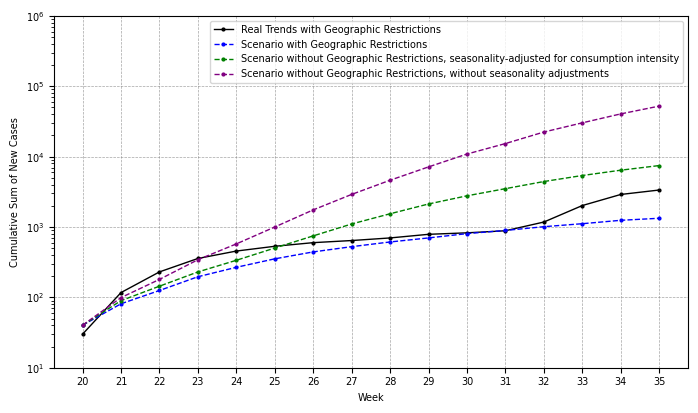

In [8]:
#@title Graph of simulation
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Merge the two dataframes on the 'Week' column
plt.figure(figsize=(7.08, 4.23))  # Maximum width of 180 mm converted to inches

# Plotting the data
plt.plot(df_cumul['Week'], df_cumul['Real Cases with Geographic Restrictions'],
         marker='o', markersize=2, color='black', linestyle='-', linewidth=1,
         label='Real Trends with Geographic Restrictions')
plt.plot(df_cumul['Week'], df_cumul['Predicted with Restriction Scenario'],
         marker='o', markersize=2, color='blue', linestyle='dashed', linewidth=1,
         label='Scenario with Geographic Restrictions')
plt.plot(df_cumul['Week'], df_cumul['Without Geographic Restrictions_Lower Bound19'],
         linestyle='dashed', linewidth=1, marker='o', markersize=2, color='green',
         label='Scenario without Geographic Restrictions, seasonality-adjusted for consumption intensity')
plt.plot(df_cumul['Week'], df_cumul['Without Geographic Restrictions_Upper Bound19'],
         linestyle='dashed', linewidth=1, marker='o', color='purple', markersize=2,
         label='Scenario without Geographic Restrictions, without seasonality adjustments')

# Setting labels
plt.xlabel('Week', fontsize=7, fontname='DejaVu Sans')  # Using 5-7 pt san serif font
plt.ylabel('Cumulative Sum of New Cases', fontsize=7, fontname='DejaVu Sans')  # Using 5-7 pt san serif font

# Set y-axis to logarithmic scale
plt.yscale('log')
plt.yticks([10, 100, 1000, 10000, 100000, 1000000], fontsize=7)  # Set custom y-axis ticks

# Generate Week numbers at 1-Week intervals
Week_numbers = df_cumul['Week']
plt.xticks(ticks=Week_numbers, fontsize=7, fontname='DejaVu Sans')  # Using 5-7 pt sans-serif font (DejaVu Sans')

# Adding legend
plt.legend(prop={'size': 7, 'family': 'DejaVu Sans'})  # Using 5-7 pt sans-serif font (DejaVu Sans' for legend

# Create the grid for vertical lines
plt.grid(True, axis='x', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add horizontal grid lines only at 10^x intervals
ax = plt.gca()
ax.grid(True, which='major', axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust layout
plt.tight_layout()

# Save the plot as a JPEG file with 300 DPI
plt.savefig('/content/drive/MyDrive/SP/plot_graph_20241123.jpg', dpi=600)

# Save the plot as a SVG file (vector graphic)
plt.savefig('/content/drive/MyDrive/SP/plot_graph_20241123.svg')

# Save the plot as a PDF file (vector graphic)
plt.savefig('/content/drive/MyDrive/SP/plot_graph_20241123.pdf')

# Show the plot
plt.show()

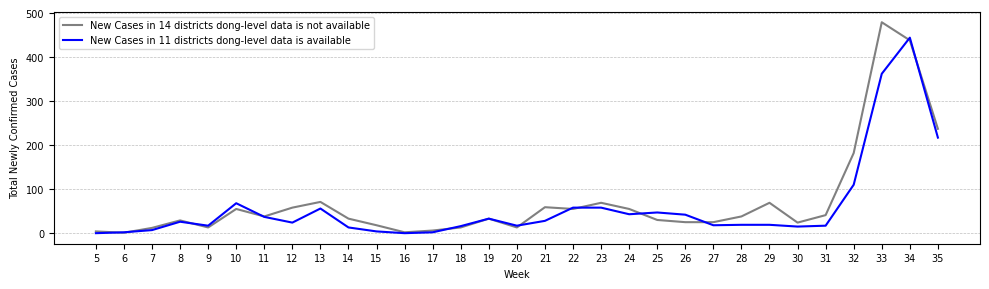

In [ ]:
#@title infection case comparsions between 14 gu and 11 gu
plt.figure(figsize = (10,3))
plt.plot(df_inf['week'], df_inf['Group14'], color = 'grey', linestyle = '-', label = 'New Cases in 14 districts dong-level data is not available')
plt.plot(df_inf['week'], df_inf['Group11'], color ='blue', linestyle = '-', label = 'New Cases in 11 districts dong-level data is available')

plt.xlabel('Week', fontsize=7, fontname='DejaVu Sans')
plt.ylabel('Total Newly Confirmed Cases', fontsize=7, fontname='DejaVu Sans')
plt.yticks(fontsize=7)  # Set custom y-axis ticks

week_numbers = df_inf['week']
plt.xticks(ticks=week_numbers,fontsize=7, fontname='DejaVu Sans')  # Using 5-7 pt sans-serif font (DejaVu Sans'
plt.legend(prop={'size': 7, 'family': 'DejaVu Sans'})  # Using 5-7 pt sans-serif font (DejaVu Sans' for legend

# Create the grid for vertical lines
#plt.grid(True, axis='x', color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
# Create the grid for vertical lines
plt.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.tight_layout()

# Save the plot as a JPEG file with 300 DPI
plt.savefig('/content/drive/MyDrive/SP/plot_14 and 11 graph_grid both_20241119.jpg', dpi=1800)
# Save the plot as a SVG file (vector graphic)
plt.savefig('/content/drive/MyDrive/SP/plot_14 and 11 graph_20241119.svg')

# Save the plot as a PDF file (vector graphic)
plt.savefig('/content/drive/MyDrive/SP/plot_14 and 11 graph_20241119.pdf')

plt.show()

below are the other graphs for explorations.

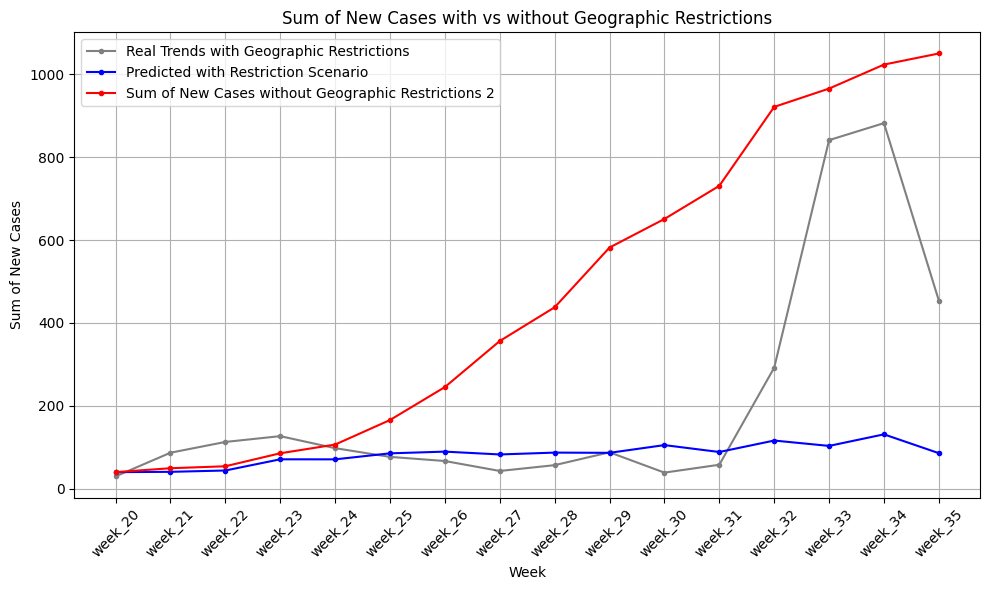

In [ ]:
#@title Plotting Real Case Trend with a logarithmic scale
# Merge the two dataframes on the 'Week' column
plt.figure(figsize = (10,6))
plt.plot(df['Week'], df['Real Cases with Geographic Restrictions'], marker = 'o', markersize = 3, color = 'grey', linestyle = '-', label = 'Real Trends with Geographic Restrictions')
plt.plot(df['Week'], df['Predicted with Restriction Scenario'], marker = 'o', markersize = 3, color ='blue', linestyle = '-', label = 'Predicted with Restriction Scenario')
# plt.plot(df['Week'], df['Without Geographic Restrictions_Lower Bound1017_20'], marker = 'o', markersize = 3, linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions 1')
plt.plot(df['Week'], df['Without Geographic Restrictions_Lower Bound19'], marker = 'o', markersize = 3, color = 'red', linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions 2')
# plt.plot(df['Week'], df['Without Geographic Restrictions_Upper Bound19'], marker = 'o', color = 'red', markersize = 3, linestyle = '-', label = 'Without Geographic Restrictions_Upper Bound19')
# plt.plot(df['Week'], df['Lockdown Scenario'], marker = 'o', markersize = 3, linestyle = '-', label = 'Lockdown Scenario')
# plt.plot(df['Week'], df['Dis1017_some'], marker = 'o',markersize = 3,  linestyle = '-', label = 'Dis1017_some')
# plt.plot(df['Week'], df['Dis1017_some_realNS'], marker = 'o',markersize = 3, linestyle = '-', label = 'Dis1017_some_realNS')
plt.xlabel('Week')
plt.ylabel('Sum of New Cases')
plt.title('Sum of New Cases with vs without Geographic Restrictions')
# plt.yscale('log') # Set y-axis to lagrithmic scale
#plt.yticks([10, 100, 1000, 10000, 100000])  # Set custom y-axis ticks
plt.xticks(rotation = 45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

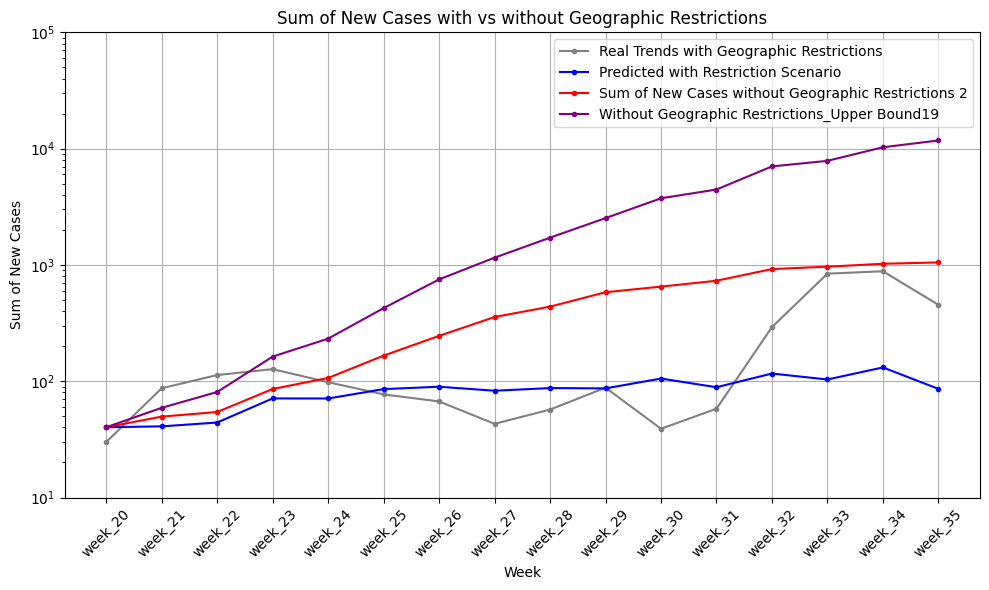

In [ ]:
#@title Plotting Real Case Trend with a logarithmic scale
# Merge the two dataframes on the 'Week' column
plt.figure(figsize = (10,6))
plt.plot(df['Week'], df['Real Cases with Geographic Restrictions'], marker = 'o', markersize = 3, color = 'grey', linestyle = '-', label = 'Real Trends with Geographic Restrictions')
plt.plot(df['Week'], df['Predicted with Restriction Scenario'], marker = 'o', markersize = 3, color ='blue', linestyle = '-', label = 'Predicted with Restriction Scenario')
#plt.plot(df['Week'], df['Without Geographic Restrictions_Lower Bound1017_20'], marker = 'o', markersize = 3, linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions 1')
plt.plot(df['Week'], df['Without Geographic Restrictions_Lower Bound19'], marker = 'o', markersize = 3, color = 'red', linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions 2')
plt.plot(df['Week'], df['Without Geographic Restrictions_Upper Bound19'], marker = 'o', color = 'purple', markersize = 3, linestyle = '-', label = 'Without Geographic Restrictions_Upper Bound19')
# plt.plot(df['Week'], df['Lockdown Scenario'], marker = 'o', markersize = 3, linestyle = '-', label = 'Lockdown Scenario')
# plt.plot(df['Week'], df['Dis1017_some'], marker = 'o',markersize = 3,  linestyle = '-', label = 'Dis1017_some')
# plt.plot(df['Week'], df['Dis1017_some_realNS'], marker = 'o',markersize = 3, linestyle = '-', label = 'Dis1017_some_realNS')
plt.xlabel('Week')
plt.ylabel('Sum of New Cases')
plt.title('Sum of New Cases with vs without Geographic Restrictions')
plt.yscale('log') # Set y-axis to lagrithmic scale
plt.yticks([10, 100, 1000, 10000, 100000])  # Set custom y-axis ticks
plt.xticks(rotation = 45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

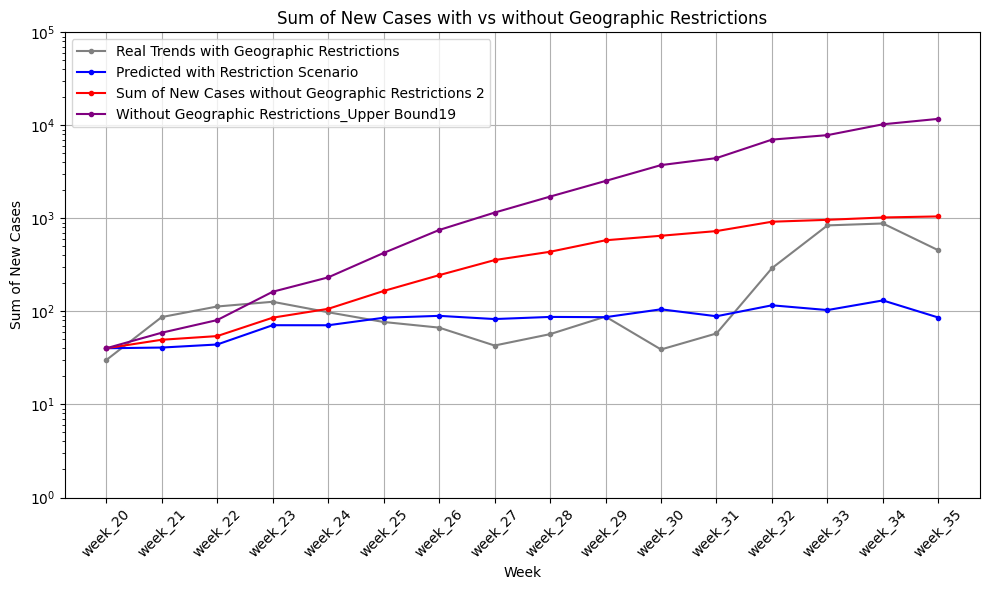

In [ ]:
#@title Plotting Real Case Trend with a logarithmic scale
# Merge the two dataframes on the 'Week' column
plt.figure(figsize = (10,6))
plt.plot(df['Week'], df['Real Cases with Geographic Restrictions'], marker = 'o', markersize = 3, color = 'grey', linestyle = '-', label = 'Real Trends with Geographic Restrictions')
plt.plot(df['Week'], df['Predicted with Restriction Scenario'], marker = 'o', markersize = 3, color ='blue', linestyle = '-', label = 'Predicted with Restriction Scenario')
#plt.plot(df['Week'], df['Without Geographic Restrictions_Lower Bound1017_20'], marker = 'o', markersize = 3, linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions 1')
plt.plot(df['Week'], df['Without Geographic Restrictions_Lower Bound19'], marker = 'o', markersize = 3, color = 'red', linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions 2')
plt.plot(df['Week'], df['Without Geographic Restrictions_Upper Bound19'], marker = 'o', color = 'purple', markersize = 3, linestyle = '-', label = 'Without Geographic Restrictions_Upper Bound19')
# plt.plot(df['Week'], df['Lockdown Scenario'], marker = 'o', markersize = 3, linestyle = '-', label = 'Lockdown Scenario')
# plt.plot(df['Week'], df['Dis1017_some'], marker = 'o',markersize = 3,  linestyle = '-', label = 'Dis1017_some')
# plt.plot(df['Week'], df['Dis1017_some_realNS'], marker = 'o',markersize = 3, linestyle = '-', label = 'Dis1017_some_realNS')
plt.xlabel('Week')
plt.ylabel('Sum of New Cases')
plt.title('Sum of New Cases with vs without Geographic Restrictions')
plt.yscale('log') # Set y-axis to lagrithmic scale
plt.yticks([1, 10, 100, 1000, 10000, 100000])  # Set custom y-axis ticks
plt.xticks(rotation = 45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

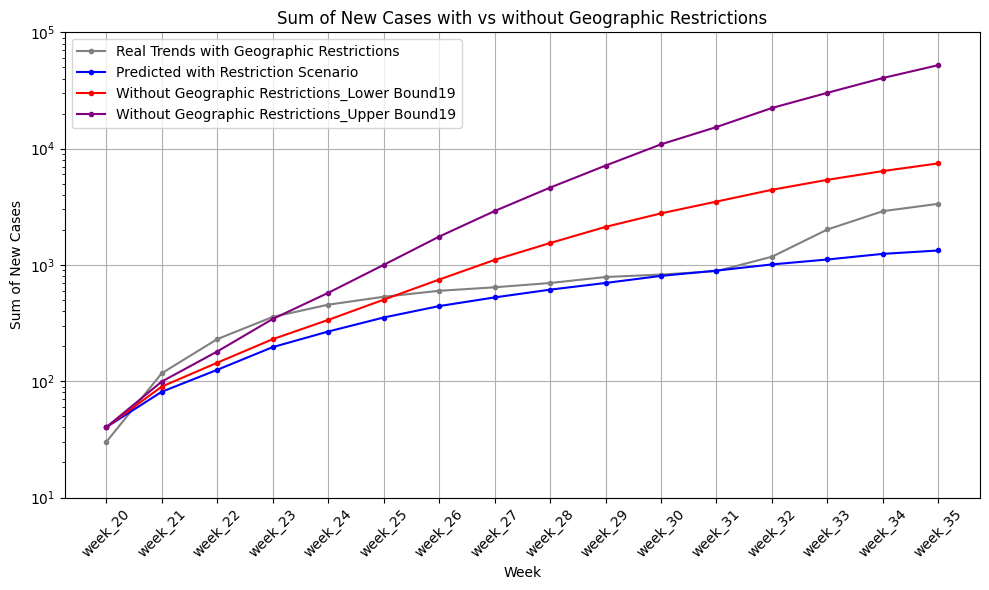

In [ ]:
#@title Plotting Real Case Trend with a logarithmic scale
# Merge the two dataframes on the 'Week' column
plt.figure(figsize = (10,6))
plt.plot(df_cumul['Week'], df_cumul['Real Cases with Geographic Restrictions'], marker = 'o', markersize = 3, color = 'grey', linestyle = '-', label = 'Real Trends with Geographic Restrictions')
plt.plot(df_cumul['Week'], df_cumul['Predicted with Restriction Scenario'], marker = 'o', markersize = 3, color ='blue', linestyle = '-', label = 'Predicted with Restriction Scenario')
#plt.plot(df_cumul['Week'], df_cumul['Without Geographic Restrictions_Lower Bound1017_20'], marker = 'o', markersize = 3, linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions 1')
plt.plot(df_cumul['Week'], df_cumul['Without Geographic Restrictions_Lower Bound19'], marker = 'o', markersize = 3, color = 'red', linestyle = '-', label = 'Without Geographic Restrictions_Lower Bound19')
plt.plot(df_cumul['Week'], df_cumul['Without Geographic Restrictions_Upper Bound19'], marker = 'o', color = 'purple', markersize = 3, linestyle = '-', label = 'Without Geographic Restrictions_Upper Bound19')
# plt.plot(df_cumul['Week'], df_cumul['Lockdown Scenario'], marker = 'o', markersize = 3, linestyle = '-', label = 'Lockdown Scenario')
# plt.plot(df_cumul['Week'], df_cumul['Dis1017_some'], marker = 'o',markersize = 3,  linestyle = '-', label = 'Dis1017_some')
# plt.plot(df_cumul['Week'], df_cumul['Dis1017_some_realNS'], marker = 'o',markersize = 3, linestyle = '-', label = 'Dis1017_some_realNS')
plt.xlabel('Week')
plt.ylabel('Sum of New Cases')
plt.title('Sum of New Cases with vs without Geographic Restrictions')
plt.yscale('log') # Set y-axis to lagrithmic scale
plt.yticks([10, 100, 1000, 10000, 100000])  # Set custom y-axis ticks
plt.xticks(rotation = 45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

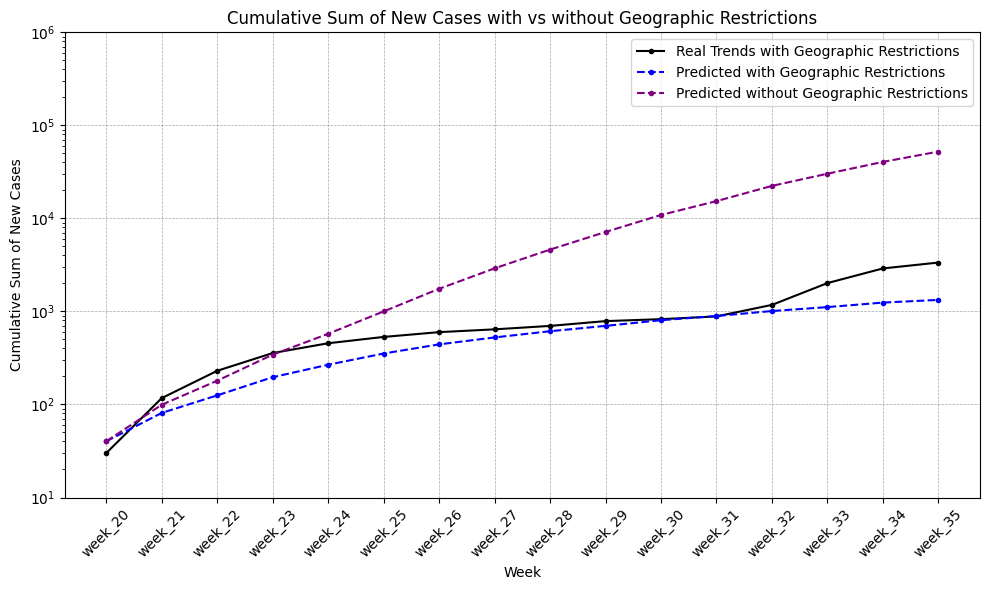

In [ ]:
#@title Plotting Real Case Trend with a logarithmic scale
# Merge the two dataframes on the 'Week' column
plt.figure(figsize = (10,6))
plt.plot(df_cumul['Week'], df_cumul['Real Cases with Geographic Restrictions'], marker = 'o', markersize = 3, color = 'black', linestyle = '-', label = 'Real Trends with Geographic Restrictions')
plt.plot(df_cumul['Week'], df_cumul['Predicted with Restriction Scenario'], marker = 'o', markersize = 3, color ='blue', linestyle='dashed', label = 'Predicted with Geographic Restrictions')
#plt.plot(df_cumul['Week'], df_cumul['Without Geographic Restrictions_Lower Bound1017_20'], marker = 'o', markersize = 3, linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions 1')
#plt.plot(df_cumul['Week'], df_cumul['Without Geographic Restrictions_Lower Bound19'], marker = 'o', markersize = 3, color = 'red', linestyle = '-', label = 'Without Geographic Restrictions_Lower Bound19')
plt.plot(df_cumul['Week'], df_cumul['Without Geographic Restrictions_Upper Bound19'],linestyle='dashed', marker = 'o', color = 'purple', markersize = 3, label = 'Predicted without Geographic Restrictions')
# plt.plot(df_cumul['Week'], df_cumul['Lockdown Scenario'], marker = 'o', markersize = 3, linestyle = '-', label = 'Lockdown Scenario')
# plt.plot(df_cumul['Week'], df_cumul['Dis1017_some'], marker = 'o',markersize = 3,  linestyle = '-', label = 'Dis1017_some')
# plt.plot(df_cumul['Week'], df_cumul['Dis1017_some_realNS'], marker = 'o',markersize = 3, linestyle = '-', label = 'Dis1017_some_realNS')
plt.xlabel('Week')
plt.ylabel('Cumulative Sum of New Cases')
plt.title('Cumulative Sum of New Cases with vs without Geographic Restrictions')
plt.yscale('log') # Set y-axis to lagrithmic scale
plt.yticks([10, 100, 1000, 10000, 100000, 1000000])  # Set custom y-axis ticks
plt.xticks(rotation = 45)
plt.legend()

# Create the grid for vertical lines
plt.grid(True, axis='x', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add horizontal grid lines only at 10^x intervals
ax = plt.gca()
#ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10))
ax.grid(True, which='major', axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

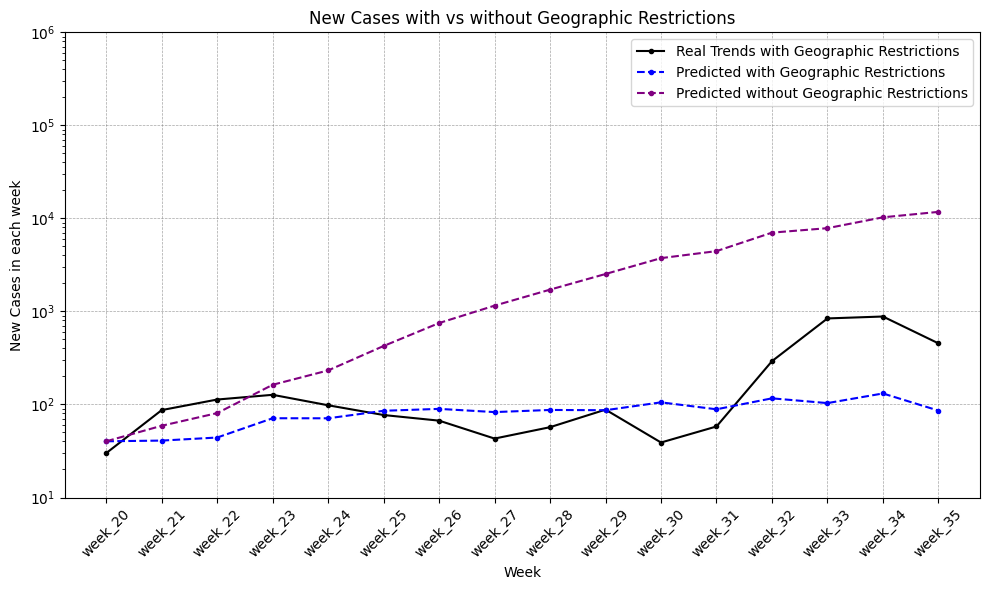

In [ ]:
#@title Plotting Real Case Trend with a logarithmic scale
# Merge the two dataframes on the 'Week' column
plt.figure(figsize = (10,6))
plt.plot(df['Week'], df['Real Cases with Geographic Restrictions'], marker = 'o', markersize = 3, color = 'black', linestyle = '-', label = 'Real Trends with Geographic Restrictions')
plt.plot(df['Week'], df['Predicted with Restriction Scenario'], marker = 'o', markersize = 3, color ='blue', linestyle='dashed', label = 'Predicted with Geographic Restrictions')
#plt.plot(df['Week'], df['Without Geographic Restrictions_Lower Bound1017_20'], marker = 'o', markersize = 3, linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions 1')
#plt.plot(df['Week'], df['Without Geographic Restrictions_Lower Bound19'], marker = 'o', markersize = 3, color = 'red', linestyle = '-', label = 'Without Geographic Restrictions_Lower Bound19')
plt.plot(df['Week'], df['Without Geographic Restrictions_Upper Bound19'],linestyle='dashed', marker = 'o', color = 'purple', markersize = 3, label = 'Predicted without Geographic Restrictions')
# plt.plot(df['Week'], df['Lockdown Scenario'], marker = 'o', markersize = 3, linestyle = '-', label = 'Lockdown Scenario')
# plt.plot(df['Week'], df['Dis1017_some'], marker = 'o',markersize = 3,  linestyle = '-', label = 'Dis1017_some')
# plt.plot(df['Week'], df['Dis1017_some_realNS'], marker = 'o',markersize = 3, linestyle = '-', label = 'Dis1017_some_realNS')
plt.xlabel('Week')
plt.ylabel('New Cases in each week')
plt.title('New Cases with vs without Geographic Restrictions')
plt.yscale('log') # Set y-axis to lagrithmic scale
plt.yticks([10, 100, 1000, 10000, 100000, 1000000])  # Set custom y-axis ticks
plt.xticks(rotation = 45)
plt.legend()

# Create the grid for vertical lines
plt.grid(True, axis='x', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add horizontal grid lines only at 10^x intervals
ax = plt.gca()
#ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10))
ax.grid(True, which='major', axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

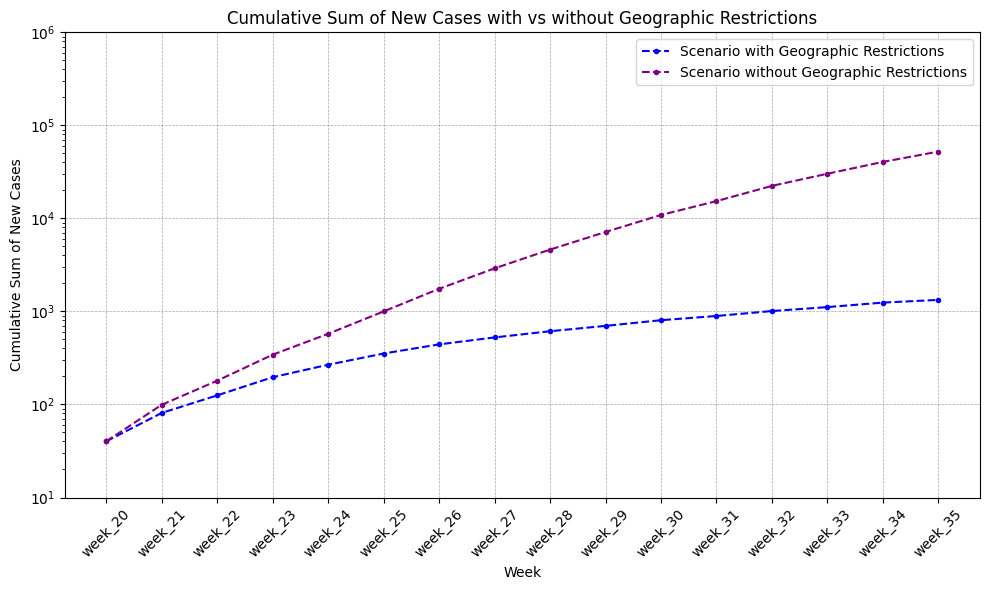

In [ ]:
#@title Plotting Real Case Trend with a logarithmic scale
# Merge the two dataframes on the 'Week' column
plt.figure(figsize = (10,6))
# plt.plot(df_cumul['Week'], df_cumul['Real Cases with Geographic Restrictions'], marker = 'o', markersize = 3, color = 'black', linestyle = '-', label = 'Real Trends with Geographic Restrictions')
plt.plot(df_cumul['Week'], df_cumul['Predicted with Restriction Scenario'], marker = 'o', markersize = 3, color ='blue', linestyle='dashed', label = 'Scenario with Geographic Restrictions')
#plt.plot(df_cumul['Week'], df_cumul['Without Geographic Restrictions_Lower Bound1017_20'], marker = 'o', markersize = 3, linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions 1')
#plt.plot(df_cumul['Week'], df_cumul['Without Geographic Restrictions_Lower Bound19'], marker = 'o', markersize = 3, color = 'red', linestyle = '-', label = 'Without Geographic Restrictions_Lower Bound19')
plt.plot(df_cumul['Week'], df_cumul['Without Geographic Restrictions_Upper Bound19'],linestyle='dashed', marker = 'o', color = 'purple', markersize = 3, label = 'Scenario without Geographic Restrictions')
# plt.plot(df_cumul['Week'], df_cumul['Lockdown Scenario'], marker = 'o', markersize = 3, linestyle = '-', label = 'Lockdown Scenario')
# plt.plot(df_cumul['Week'], df_cumul['Dis1017_some'], marker = 'o',markersize = 3,  linestyle = '-', label = 'Dis1017_some')
# plt.plot(df_cumul['Week'], df_cumul['Dis1017_some_realNS'], marker = 'o',markersize = 3, linestyle = '-', label = 'Dis1017_some_realNS')
plt.xlabel('Week')
plt.ylabel('Cumulative Sum of New Cases')
plt.title('Cumulative Sum of New Cases with vs without Geographic Restrictions')
plt.yscale('log') # Set y-axis to lagrithmic scale
plt.yticks([10, 100, 1000, 10000, 100000, 1000000])  # Set custom y-axis ticks
plt.xticks(rotation = 45)
plt.legend()

# Create the grid for vertical lines
plt.grid(True, axis='x', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add horizontal grid lines only at 10^x intervals
ax = plt.gca()
#ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10))
ax.grid(True, which='major', axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

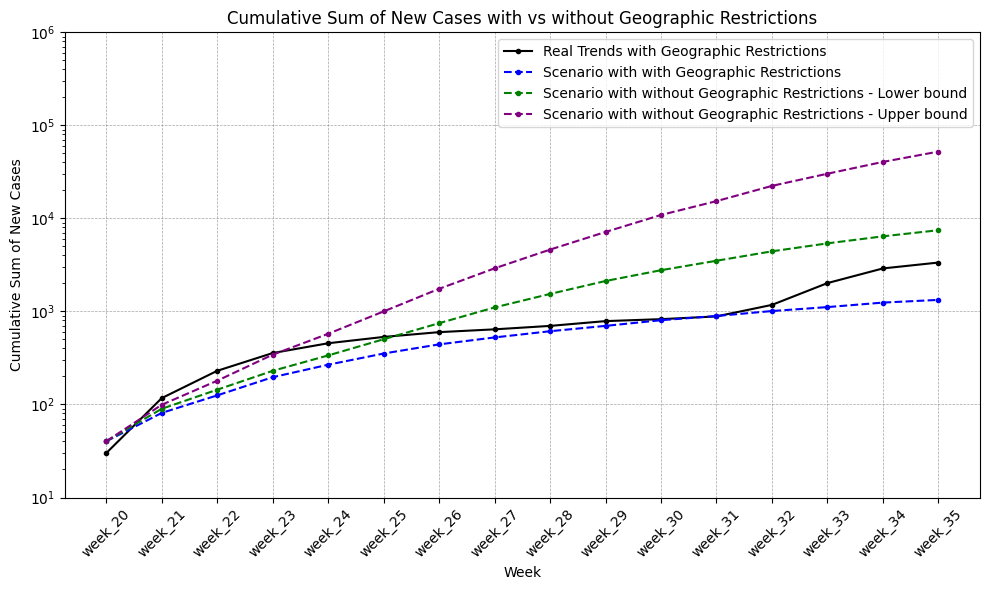

In [ ]:
#@title Plotting Real Case Trend with a logarithmic scale
# Merge the two dataframes on the 'Week' column
plt.figure(figsize = (10,6))
plt.plot(df_cumul['Week'], df_cumul['Real Cases with Geographic Restrictions'], marker = 'o', markersize = 3, color = 'black', linestyle = '-', label = 'Real Trends with Geographic Restrictions')
plt.plot(df_cumul['Week'], df_cumul['Predicted with Restriction Scenario'], marker = 'o', markersize = 3, color ='blue', linestyle='dashed', label = 'Scenario with with Geographic Restrictions')
plt.plot(df_cumul['Week'], df_cumul['Without Geographic Restrictions_Lower Bound19'],linestyle='dashed', marker = 'o', markersize = 3, color = 'green', label = 'Scenario with without Geographic Restrictions - Lower bound')
plt.plot(df_cumul['Week'], df_cumul['Without Geographic Restrictions_Upper Bound19'],linestyle='dashed', marker = 'o', color = 'purple', markersize = 3, label = 'Scenario with without Geographic Restrictions - Upper bound')
plt.xlabel('Week')
plt.ylabel('Cumulative Sum of New Cases')
plt.title('Cumulative Sum of New Cases with vs without Geographic Restrictions')
plt.yscale('log') # Set y-axis to lagrithmic scale
plt.yticks([10, 100, 1000, 10000, 100000, 1000000])  # Set custom y-axis ticks
plt.xticks(rotation = 45)
plt.legend()

# Create the grid for vertical lines
plt.grid(True, axis='x', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add horizontal grid lines only at 10^x intervals
ax = plt.gca()
#ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10))
ax.grid(True, which='major', axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/SP/plot_graph.jpg', dpi=360)  # Save the plot as a JPEG file with 360 DPI
plt.show()

In [ ]:
# Extract the numeric part from the 'Week' column and create a new 'week_num' column
df_cumul['week_num'] = df_cumul['Week'].str.extract('(\d+)').astype(int)

In [ ]:
df_cumul

,Unnamed: 0,Week,Predicted with Restriction Scenario,Real Cases with Geographic Restrictions,Without Geographic Restrictions_Lower Bound1017_20,Without Geographic Restrictions_Lower Bound19,Without Geographic Restrictions_Upper Bound19,Lockdown Scenario,Dis1017_some,Dis1017_some_realNS,week_num
0,0,week_20,40.195160,30,40.195160,40.195160,40.195160,40.195160,40.195160,40.195160,20
1,1,week_21,81.099875,117,71.457060,89.803153,99.241643,85.844851,71.147256,71.201751,21
2,2,week_22,125.223820,230,101.981733,144.133244,180.004007,138.674644,97.692702,98.400616,22
3,3,week_23,196.335731,357,142.213020,229.812454,342.771472,218.969727,127.124271,129.427301,23
4,4,week_24,267.356029,455,175.556772,336.467451,575.011469,303.317689,150.889237,154.236983,24
5,5,week_25,352.876121,532,210.335747,502.338445,1000.097962,415.059468,173.422779,178.292700,25
6,6,week_26,442.536707,599,250.738078,747.683978,1750.434685,542.133103,193.831258,201.274981,26
7,7,week_27,525.359591,642,283.067147,1104.111757,2904.704347,667.210391,208.108656,217.583368,27
8,8,week_28,612.653477,699,327.465851,1541.914999,4620.149727,808.696148,220.164135,231.378275,28
9,9,week_29,699.396762,787,368.247890,2123.807390,7146.698896,958.403341,229.276931,241.962855,29


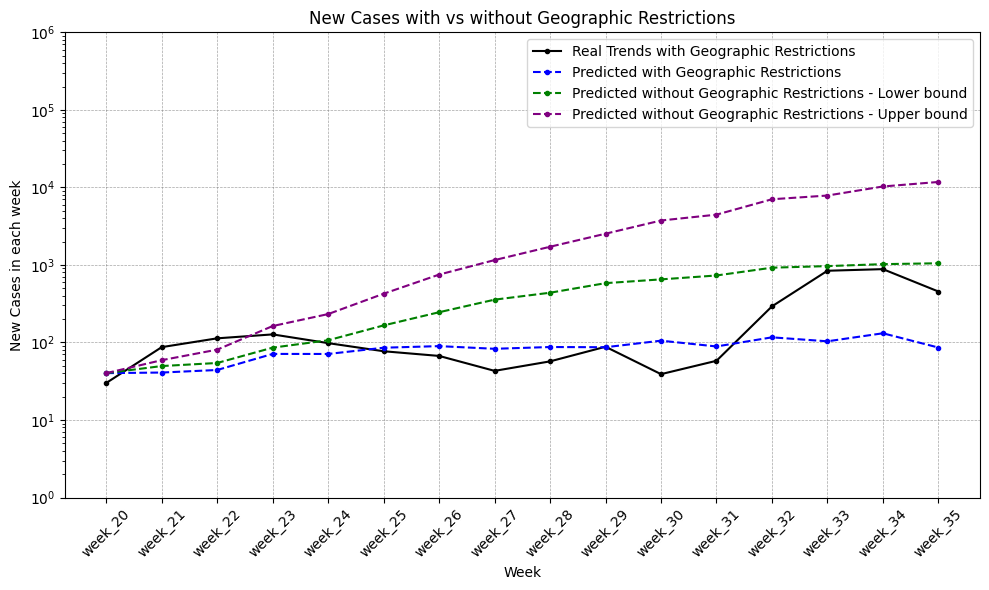

In [ ]:
#@title Plotting Real Case Trend with a logarithmic scale
# Merge the two dataframes on the 'Week' column
plt.figure(figsize = (10,6))
plt.plot(df['Week'], df['Real Cases with Geographic Restrictions'], marker = 'o', markersize = 3, color = 'black', linestyle = '-', label = 'Real Trends with Geographic Restrictions')
plt.plot(df['Week'], df['Predicted with Restriction Scenario'], marker = 'o', markersize = 3, color ='blue', linestyle='dashed', label = 'Predicted with Geographic Restrictions')
#plt.plot(df['Week'], df['Without Geographic Restrictions_Lower Bound1017_20'], marker = 'o', markersize = 3, linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions 1')
plt.plot(df['Week'], df['Without Geographic Restrictions_Lower Bound19'],linestyle='dashed', marker = 'o', markersize = 3, color = 'green', label = 'Predicted without Geographic Restrictions - Lower bound')
plt.plot(df['Week'], df['Without Geographic Restrictions_Upper Bound19'],linestyle='dashed', marker = 'o', color = 'purple', markersize = 3, label = 'Predicted without Geographic Restrictions - Upper bound')
# plt.plot(df['Week'], df['Lockdown Scenario'], marker = 'o', markersize = 3, linestyle = '-', label = 'Lockdown Scenario')
# plt.plot(df['Week'], df['Dis1017_some'], marker = 'o',markersize = 3,  linestyle = '-', label = 'Dis1017_some')
# plt.plot(df['Week'], df['Dis1017_some_realNS'], marker = 'o',markersize = 3, linestyle = '-', label = 'Dis1017_some_realNS')
plt.xlabel('Week')
plt.ylabel('New Cases in each week')
plt.title('New Cases with vs without Geographic Restrictions')
plt.yscale('log') # Set y-axis to lagrithmic scale
plt.yticks([1, 10, 100, 1000, 10000, 100000, 1000000])  # Set custom y-axis ticks
plt.xticks(rotation = 45)
plt.legend()

# Create the grid for vertical lines
plt.grid(True, axis='x', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add horizontal grid lines only at 10^x intervals
ax = plt.gca()
#ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10))
ax.grid(True, which='major', axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

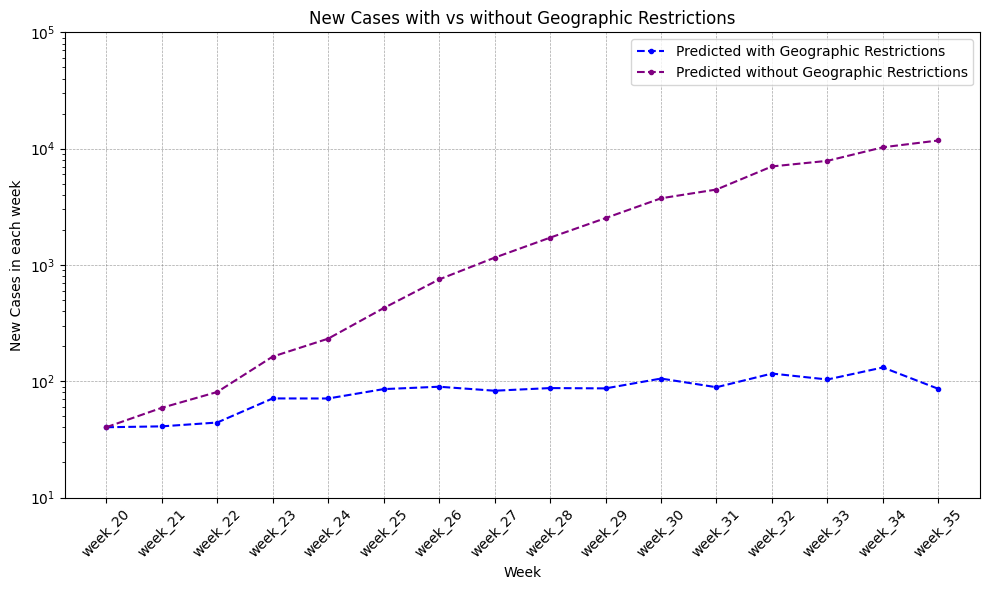

In [ ]:
#@title Plotting Real Case Trend with a logarithmic scale
# Merge the two dataframes on the 'Week' column
plt.figure(figsize = (10,6))
# plt.plot(df['Week'], df['Real Cases with Geographic Restrictions'], marker = 'o', markersize = 3, color = 'black', linestyle = '-', label = 'Real Trends with Geographic Restrictions')
plt.plot(df['Week'], df['Predicted with Restriction Scenario'], marker = 'o', markersize = 3, color ='blue', linestyle='dashed', label = 'Predicted with Geographic Restrictions')
#plt.plot(df['Week'], df['Without Geographic Restrictions_Lower Bound1017_20'], marker = 'o', markersize = 3, linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions 1')
# plt.plot(df['Week'], df['Without Geographic Restrictions_Lower Bound19'],linestyle='dashed', marker = 'o', markersize = 3, color = 'green', label = 'Predicted without Geographic Restrictions - Lower bound')
plt.plot(df['Week'], df['Without Geographic Restrictions_Upper Bound19'],linestyle='dashed', marker = 'o', color = 'purple', markersize = 3, label = 'Predicted without Geographic Restrictions')
# plt.plot(df['Week'], df['Lockdown Scenario'], marker = 'o', markersize = 3, linestyle = '-', label = 'Lockdown Scenario')
# plt.plot(df['Week'], df['Dis1017_some'], marker = 'o',markersize = 3,  linestyle = '-', label = 'Dis1017_some')
# plt.plot(df['Week'], df['Dis1017_some_realNS'], marker = 'o',markersize = 3, linestyle = '-', label = 'Dis1017_some_realNS')
plt.xlabel('Week')
plt.ylabel('New Cases in each week')
plt.title('New Cases with vs without Geographic Restrictions')
plt.yscale('log') # Set y-axis to lagrithmic scale
plt.yticks([10, 100, 1000, 10000, 100000])  # Set custom y-axis ticks
plt.xticks(rotation = 45)
plt.legend()

# Create the grid for vertical lines
plt.grid(True, axis='x', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add horizontal grid lines only at 10^x intervals
ax = plt.gca()
#ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10))
ax.grid(True, which='major', axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

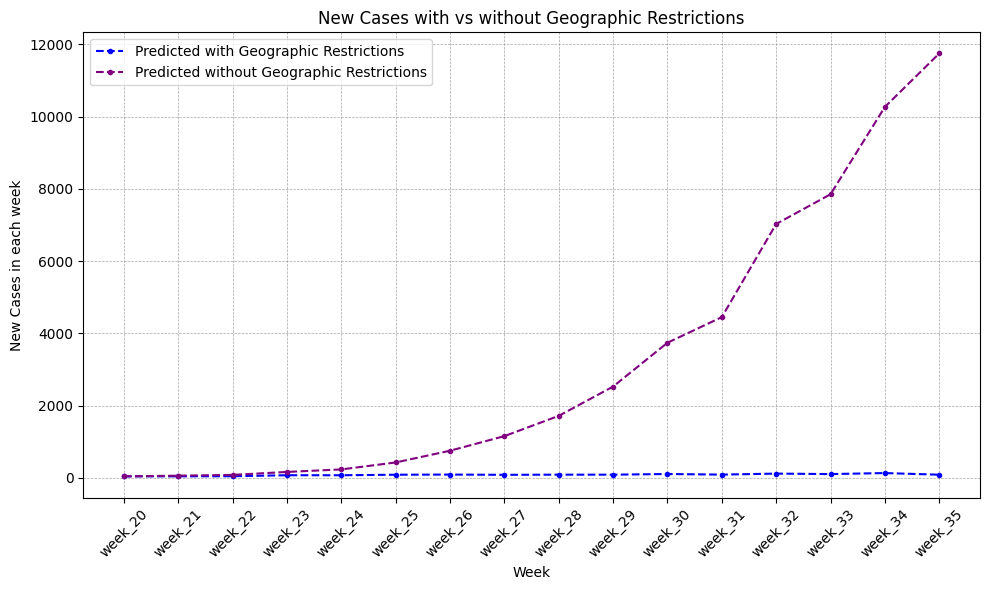

In [ ]:
#@title Plotting Real Case Trend with a logarithmic scale
# Merge the two dataframes on the 'Week' column
plt.figure(figsize = (10,6))
# plt.plot(df['Week'], df['Real Cases with Geographic Restrictions'], marker = 'o', markersize = 3, color = 'black', linestyle = '-', label = 'Real Trends with Geographic Restrictions')
plt.plot(df['Week'], df['Predicted with Restriction Scenario'], marker = 'o', markersize = 3, color ='blue', linestyle='dashed', label = 'Predicted with Geographic Restrictions')
#plt.plot(df['Week'], df['Without Geographic Restrictions_Lower Bound1017_20'], marker = 'o', markersize = 3, linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions 1')
# plt.plot(df['Week'], df['Without Geographic Restrictions_Lower Bound19'],linestyle='dashed', marker = 'o', markersize = 3, color = 'green', label = 'Predicted without Geographic Restrictions - Lower bound')
plt.plot(df['Week'], df['Without Geographic Restrictions_Upper Bound19'],linestyle='dashed', marker = 'o', color = 'purple', markersize = 3, label = 'Predicted without Geographic Restrictions')
# plt.plot(df['Week'], df['Lockdown Scenario'], marker = 'o', markersize = 3, linestyle = '-', label = 'Lockdown Scenario')
# plt.plot(df['Week'], df['Dis1017_some'], marker = 'o',markersize = 3,  linestyle = '-', label = 'Dis1017_some')
# plt.plot(df['Week'], df['Dis1017_some_realNS'], marker = 'o',markersize = 3, linestyle = '-', label = 'Dis1017_some_realNS')
plt.xlabel('Week')
plt.ylabel('New Cases in each week')
plt.title('New Cases with vs without Geographic Restrictions')
#plt.yscale('log') # Set y-axis to lagrithmic scale
#plt.yticks([10, 100, 1000, 10000, 100000])  # Set custom y-axis ticks
plt.xticks(rotation = 45)
plt.legend()

# Create the grid for vertical lines
plt.grid(True, axis='x', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add horizontal grid lines only at 10^x intervals
ax = plt.gca()
#ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10))
ax.grid(True, which='major', axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

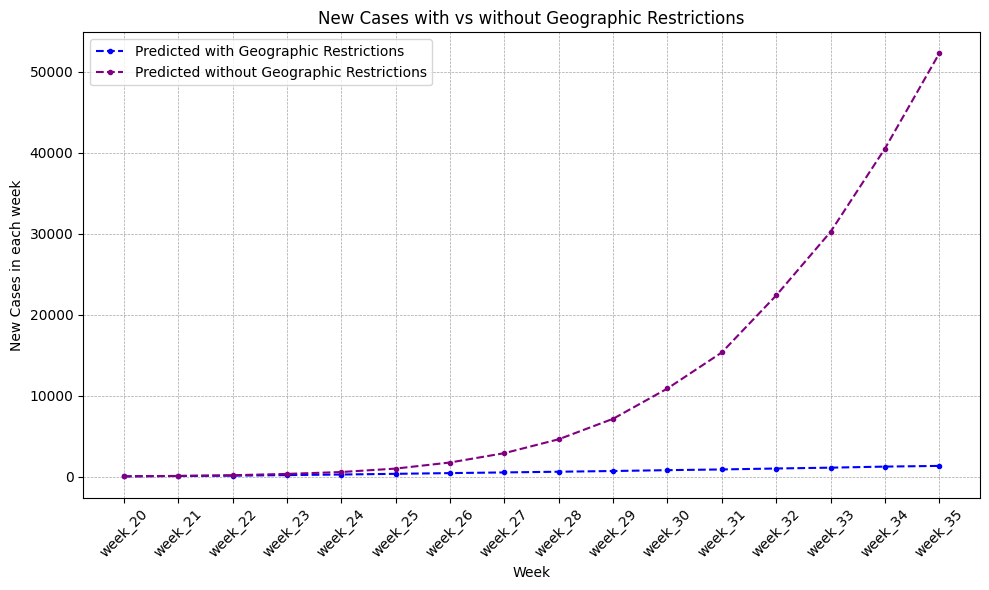

In [ ]:
#@title Plotting Real Case Trend with a logarithmic scale
# Merge the two dataframes on the 'Week' column
plt.figure(figsize = (10,6))
# plt.plot(df_cumul['Week'], df_cumul['Real Cases with Geographic Restrictions'], marker = 'o', markersize = 3, color = 'black', linestyle = '-', label = 'Real Trends with Geographic Restrictions')
plt.plot(df_cumul['Week'], df_cumul['Predicted with Restriction Scenario'], marker = 'o', markersize = 3, color ='blue', linestyle='dashed', label = 'Predicted with Geographic Restrictions')
#plt.plot(df_cumul['Week'], df_cumul['Without Geographic Restrictions_Lower Bound1017_20'], marker = 'o', markersize = 3, linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions 1')
# plt.plot(df_cumul['Week'], df_cumul['Without Geographic Restrictions_Lower Bound19'],linestyle='dashed', marker = 'o', markersize = 3, color = 'green', label = 'Predicted without Geographic Restrictions - Lower bound')
plt.plot(df_cumul['Week'], df_cumul['Without Geographic Restrictions_Upper Bound19'],linestyle='dashed', marker = 'o', color = 'purple', markersize = 3, label = 'Predicted without Geographic Restrictions')
# plt.plot(df_cumul['Week'], df_cumul['Lockdown Scenario'], marker = 'o', markersize = 3, linestyle = '-', label = 'Lockdown Scenario')
# plt.plot(df_cumul['Week'], df_cumul['Dis1017_some'], marker = 'o',markersize = 3,  linestyle = '-', label = 'Dis1017_some')
# plt.plot(df_cumul['Week'], df_cumul['Dis1017_some_realNS'], marker = 'o',markersize = 3, linestyle = '-', label = 'Dis1017_some_realNS')
plt.xlabel('Week')
plt.ylabel('New Cases in each week')
plt.title('New Cases with vs without Geographic Restrictions')
#plt.yscale('log') # Set y-axis to lagrithmic scale
#plt.yticks([10, 100, 1000, 10000, 100000])  # Set custom y-axis ticks
plt.xticks(rotation = 45)
plt.legend()

# Create the grid for vertical lines
plt.grid(True, axis='x', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add horizontal grid lines only at 10^x intervals
ax = plt.gca()
#ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10))
ax.grid(True, which='major', axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

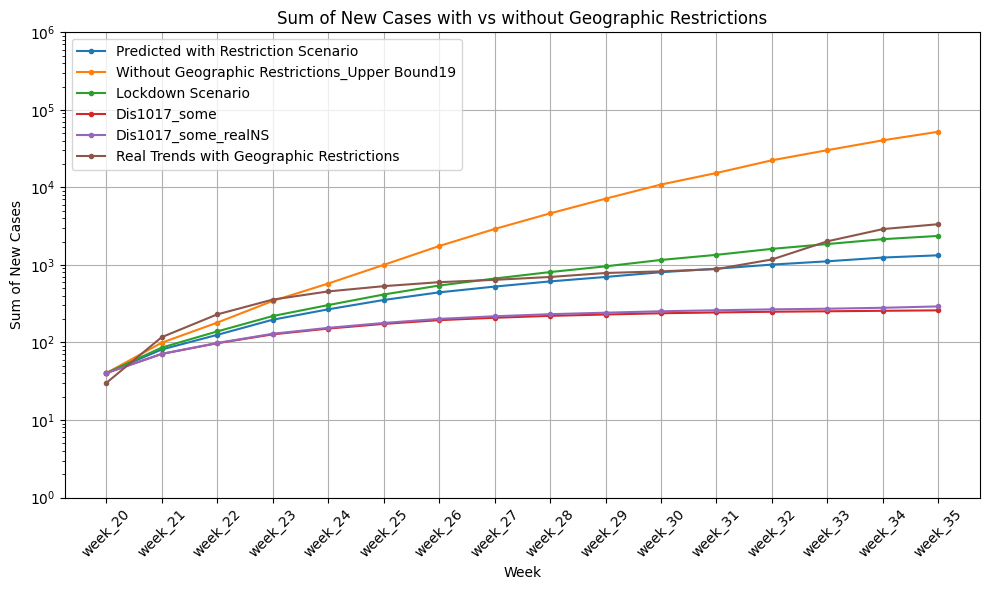

In [ ]:
#@title Plotting Real Case Trend with a logarithmic scale
# Merge the two dataframes on the 'Week' column
plt.figure(figsize = (10,6))

plt.plot(df_cumul['Week'], df_cumul['Predicted with Restriction Scenario'], marker = 'o', markersize = 3, linestyle = '-', label = 'Predicted with Restriction Scenario')
# plt.plot(df_cumul['Week'], df_cumul['Without Geographic Restrictions_Lower Bound1017_20'], marker = 'o', markersize = 3, linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions 1')
# plt.plot(df_cumul['Week'], df_cumul['Without Geographic Restrictions_Lower Bound19'], marker = 'o', markersize = 3, linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions 2')
plt.plot(df_cumul['Week'], df_cumul['Without Geographic Restrictions_Upper Bound19'], marker = 'o', markersize = 3, linestyle = '-', label = 'Without Geographic Restrictions_Upper Bound19')
plt.plot(df_cumul['Week'], df_cumul['Lockdown Scenario'], marker = 'o', markersize = 3, linestyle = '-', label = 'Lockdown Scenario')
plt.plot(df_cumul['Week'], df_cumul['Dis1017_some'], marker = 'o',markersize = 3,  linestyle = '-', label = 'Dis1017_some')
plt.plot(df_cumul['Week'], df_cumul['Dis1017_some_realNS'], marker = 'o',markersize = 3, linestyle = '-', label = 'Dis1017_some_realNS')
plt.plot(df_cumul['Week'], df_cumul['Real Cases with Geographic Restrictions'], marker = 'o', markersize = 3, linestyle = '-', label = 'Real Trends with Geographic Restrictions')
plt.xlabel('Week')
plt.ylabel('Sum of New Cases')
plt.title('Sum of New Cases with vs without Geographic Restrictions')
plt.yscale('log') # Set y-axis to lagrithmic scale
plt.yticks([1, 10, 100, 1000, 10000, 100000, 1000000])  # Set custom y-axis ticks
plt.xticks(rotation = 45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

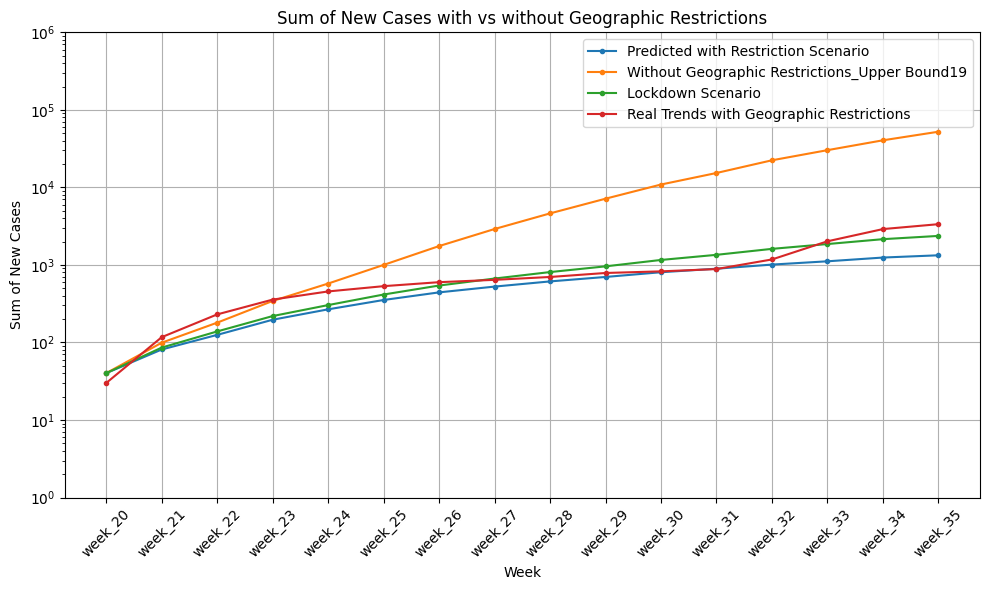

In [ ]:
#@title Plotting Real Case Trend with a logarithmic scale
# Merge the two dataframes on the 'Week' column
plt.figure(figsize = (10,6))

plt.plot(df_cumul['Week'], df_cumul['Predicted with Restriction Scenario'], marker = 'o', markersize = 3, linestyle = '-', label = 'Predicted with Restriction Scenario')
# plt.plot(df_cumul['Week'], df_cumul['Without Geographic Restrictions_Lower Bound1017_20'], marker = 'o', markersize = 3, linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions 1')
# plt.plot(df_cumul['Week'], df_cumul['Without Geographic Restrictions_Lower Bound19'], marker = 'o', markersize = 3, linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions 2')
plt.plot(df_cumul['Week'], df_cumul['Without Geographic Restrictions_Upper Bound19'], marker = 'o', markersize = 3, linestyle = '-', label = 'Without Geographic Restrictions_Upper Bound19')
plt.plot(df_cumul['Week'], df_cumul['Lockdown Scenario'], marker = 'o', markersize = 3, linestyle = '-', label = 'Lockdown Scenario')
# plt.plot(df_cumul['Week'], df_cumul['Dis1017_some'], marker = 'o',markersize = 3,  linestyle = '-', label = 'Dis1017_some')
# plt.plot(df_cumul['Week'], df_cumul['Dis1017_some_realNS'], marker = 'o',markersize = 3, linestyle = '-', label = 'Dis1017_some_realNS')
plt.plot(df_cumul['Week'], df_cumul['Real Cases with Geographic Restrictions'], marker = 'o', markersize = 3, linestyle = '-', label = 'Real Trends with Geographic Restrictions')
plt.xlabel('Week')
plt.ylabel('Sum of New Cases')
plt.title('Sum of New Cases with vs without Geographic Restrictions')
plt.yscale('log') # Set y-axis to lagrithmic scale
plt.yticks([1, 10, 100, 1000, 10000, 100000, 1000000])  # Set custom y-axis ticks
plt.xticks(rotation = 45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

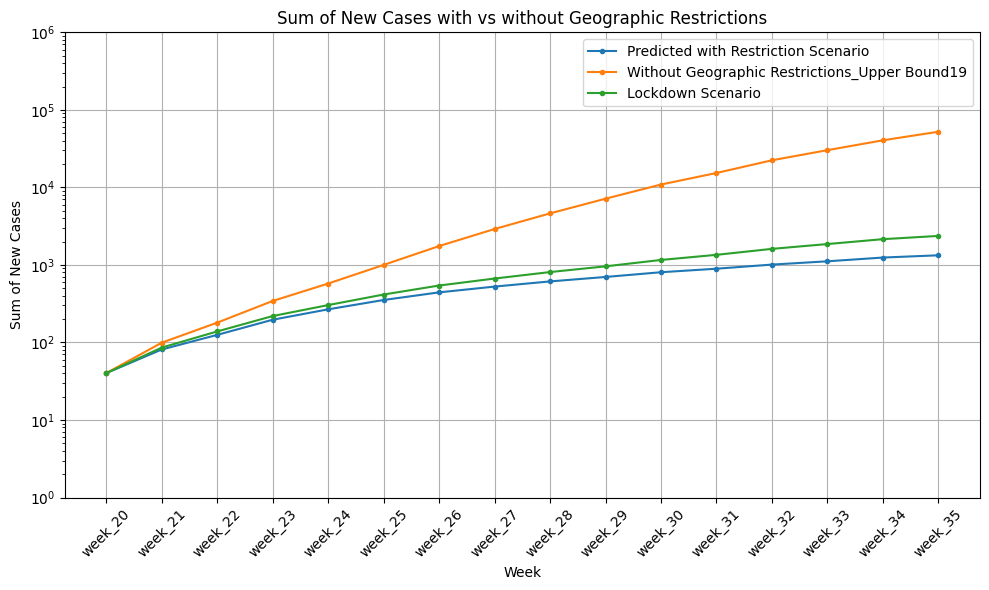

In [ ]:
#@title Plotting Real Case Trend with a logarithmic scale
# Merge the two dataframes on the 'Week' column
plt.figure(figsize = (10,6))

plt.plot(df_cumul['Week'], df_cumul['Predicted with Restriction Scenario'], marker = 'o', markersize = 3, linestyle = '-', label = 'Predicted with Restriction Scenario')
# plt.plot(df_cumul['Week'], df_cumul['Without Geographic Restrictions_Lower Bound1017_20'], marker = 'o', markersize = 3, linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions 1')
# plt.plot(df_cumul['Week'], df_cumul['Without Geographic Restrictions_Lower Bound19'], marker = 'o', markersize = 3, linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions 2')
plt.plot(df_cumul['Week'], df_cumul['Without Geographic Restrictions_Upper Bound19'], marker = 'o', markersize = 3, linestyle = '-', label = 'Without Geographic Restrictions_Upper Bound19')
plt.plot(df_cumul['Week'], df_cumul['Lockdown Scenario'], marker = 'o', markersize = 3, linestyle = '-', label = 'Lockdown Scenario')
# plt.plot(df_cumul['Week'], df_cumul['Dis1017_some'], marker = 'o',markersize = 3,  linestyle = '-', label = 'Dis1017_some')
# plt.plot(df_cumul['Week'], df_cumul['Dis1017_some_realNS'], marker = 'o',markersize = 3, linestyle = '-', label = 'Dis1017_some_realNS')
# plt.plot(df_cumul['Week'], df_cumul['Real Cases with Geographic Restrictions'], marker = 'o', markersize = 3, linestyle = '-', label = 'Real Trends with Geographic Restrictions')
plt.xlabel('Week')
plt.ylabel('Sum of New Cases')
plt.title('Sum of New Cases with vs without Geographic Restrictions')
plt.yscale('log') # Set y-axis to lagrithmic scale
plt.yticks([1, 10, 100, 1000, 10000, 100000, 1000000])  # Set custom y-axis ticks
plt.xticks(rotation = 45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

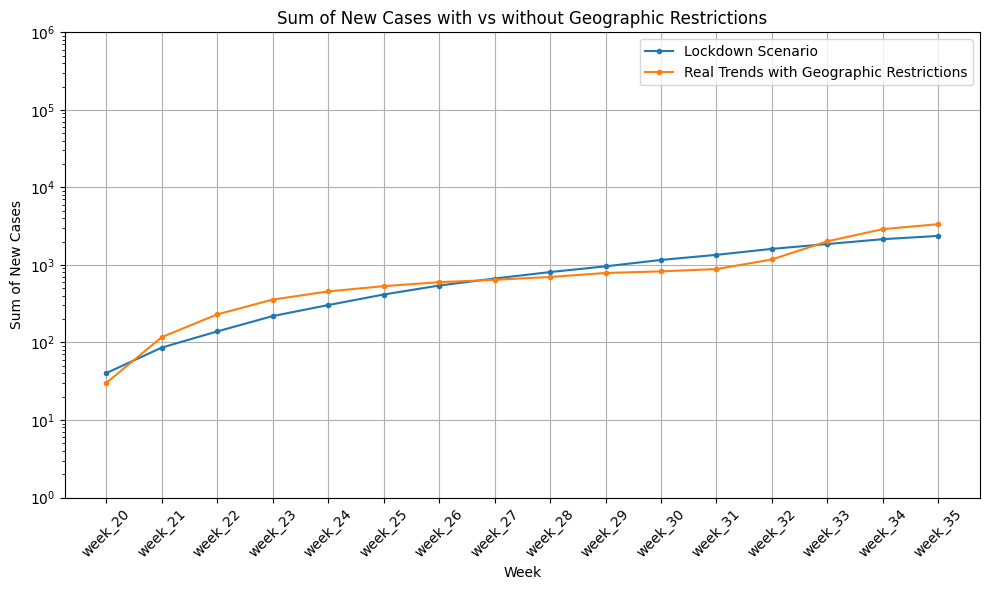

In [ ]:
#@title Plotting Real Case Trend with a logarithmic scale
# Merge the two dataframes on the 'Week' column
plt.figure(figsize = (10,6))

# plt.plot(df_cumul['Week'], df_cumul['Predicted with Restriction Scenario'], marker = 'o', markersize = 3, linestyle = '-', label = 'Predicted with Restriction Scenario')
# # plt.plot(df_cumul['Week'], df_cumul['Without Geographic Restrictions_Lower Bound1017_20'], marker = 'o', markersize = 3, linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions 1')
# # plt.plot(df_cumul['Week'], df_cumul['Without Geographic Restrictions_Lower Bound19'], marker = 'o', markersize = 3, linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions 2')
# plt.plot(df_cumul['Week'], df_cumul['Without Geographic Restrictions_Upper Bound19'], marker = 'o', markersize = 3, linestyle = '-', label = 'Without Geographic Restrictions_Upper Bound19')
plt.plot(df_cumul['Week'], df_cumul['Lockdown Scenario'], marker = 'o', markersize = 3, linestyle = '-', label = 'Lockdown Scenario')
# plt.plot(df_cumul['Week'], df_cumul['Dis1017_some'], marker = 'o',markersize = 3,  linestyle = '-', label = 'Dis1017_some')
# plt.plot(df_cumul['Week'], df_cumul['Dis1017_some_realNS'], marker = 'o',markersize = 3, linestyle = '-', label = 'Dis1017_some_realNS')
plt.plot(df_cumul['Week'], df_cumul['Real Cases with Geographic Restrictions'], marker = 'o', markersize = 3, linestyle = '-', label = 'Real Trends with Geographic Restrictions')
plt.xlabel('Week')
plt.ylabel('Sum of New Cases')
plt.title('Sum of New Cases with vs without Geographic Restrictions')
plt.yscale('log') # Set y-axis to lagrithmic scale
plt.yticks([1, 10, 100, 1000, 10000, 100000, 1000000])  # Set custom y-axis ticks
plt.xticks(rotation = 45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

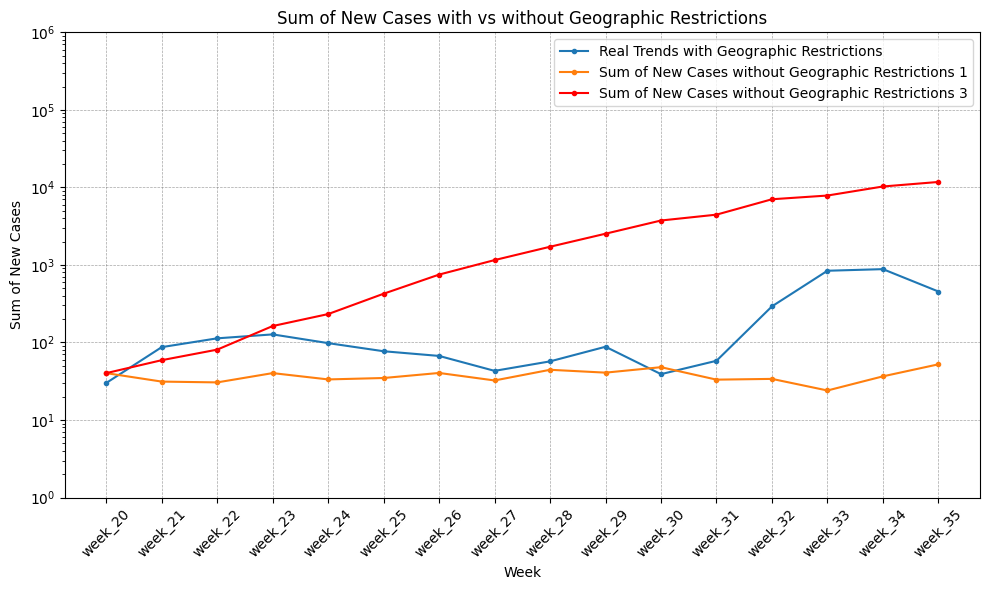

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Your existing plotting code
plt.figure(figsize=(10, 6))
plt.plot(df['Week'], df['with Geographic Restrictions'], marker='o', markersize=3, linestyle='-', label='Real Trends with Geographic Restrictions')
plt.plot(df['Week'], df['Without Geographic Restrictions_Lower Bound1017_20'], marker='o', markersize=3, linestyle='-', label='Sum of New Cases without Geographic Restrictions 1')
plt.plot(df['Week'], df['Without Geographic Restrictions_Upper Bound19'], marker='o', markersize=3, linestyle='-', color='red', label='Sum of New Cases without Geographic Restrictions 3')
plt.xlabel('Week')
plt.ylabel('Sum of New Cases')
plt.title('Sum of New Cases with vs without Geographic Restrictions')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.yticks([1, 10, 100, 1000, 10000, 100000, 1000000])  # Set custom y-axis ticks
plt.xticks(rotation=45)
plt.legend()

# Create the grid for vertical lines
plt.grid(True, axis='x', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add horizontal grid lines only at 10^x intervals
ax = plt.gca()
ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10))
ax.grid(True, which='major', axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

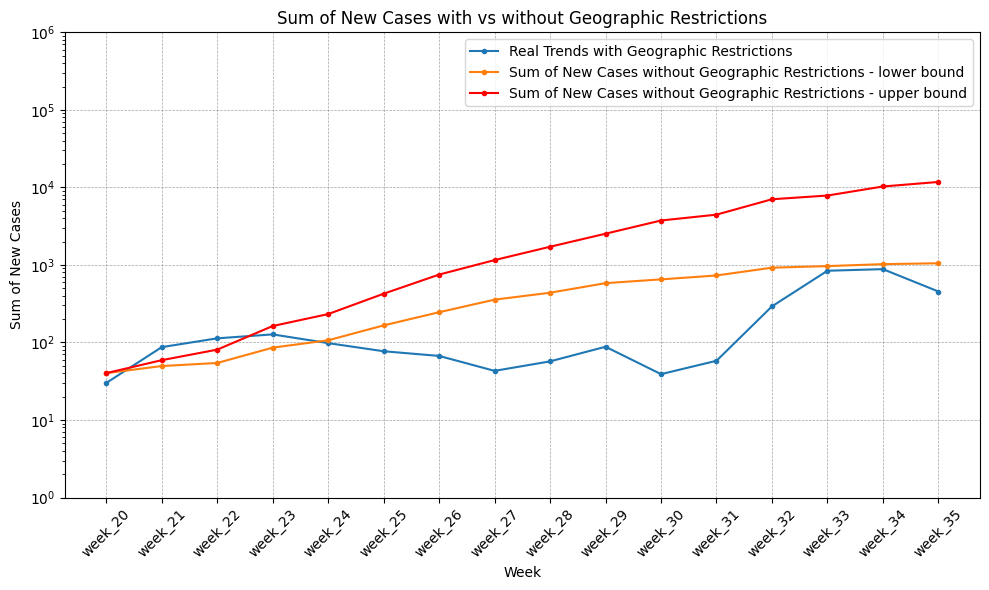

In [ ]:
#@title Plotting Real Case Trend with a logarithmic scale
# Merge the two dataframes on the 'Week' column
plt.figure(figsize = (10,6))
# plt.plot(df['Week'], df['Predicted with Restriction Scenario'], marker = 'o', markersize = 3, linestyle = '-', label = 'Predicted with Restriction Scenario')
plt.plot(df['Week'], df['with Geographic Restrictions'], marker = 'o', markersize = 3, linestyle = '-', label = 'Real Trends with Geographic Restrictions')
# plt.plot(df['Week'], df['Without Geographic Restrictions_Lower Bound1017_20'], marker = 'o', markersize = 3, linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions 1')
plt.plot(df['Week'], df['Without Geographic Restrictions_Lower Bound19'], marker = 'o', markersize = 3, linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions - lower bound')
plt.plot(df['Week'], df['Without Geographic Restrictions_Upper Bound19'], marker = 'o', markersize = 3, linestyle = '-', color = 'red', label = 'Sum of New Cases without Geographic Restrictions - upper bound')
# plt.plot(df['Week'], df['Midpoint of Without Geographic Restriction'], marker = 'o', linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions 4')
plt.xlabel('Week')
plt.ylabel('Sum of New Cases')
plt.title('Sum of New Cases with vs without Geographic Restrictions')
plt.yscale('log') # Set y-axis to lagrithmic scale
plt.yticks([1, 10, 100, 1000, 10000, 100000, 1000000])  # Set custom y-axis ticks
plt.xticks(rotation = 45)
plt.legend()

# Create the grid for vertical lines
plt.grid(True, axis='x', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add horizontal grid lines only at 10^x intervals
ax = plt.gca()
ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10))
ax.grid(True, which='major', axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

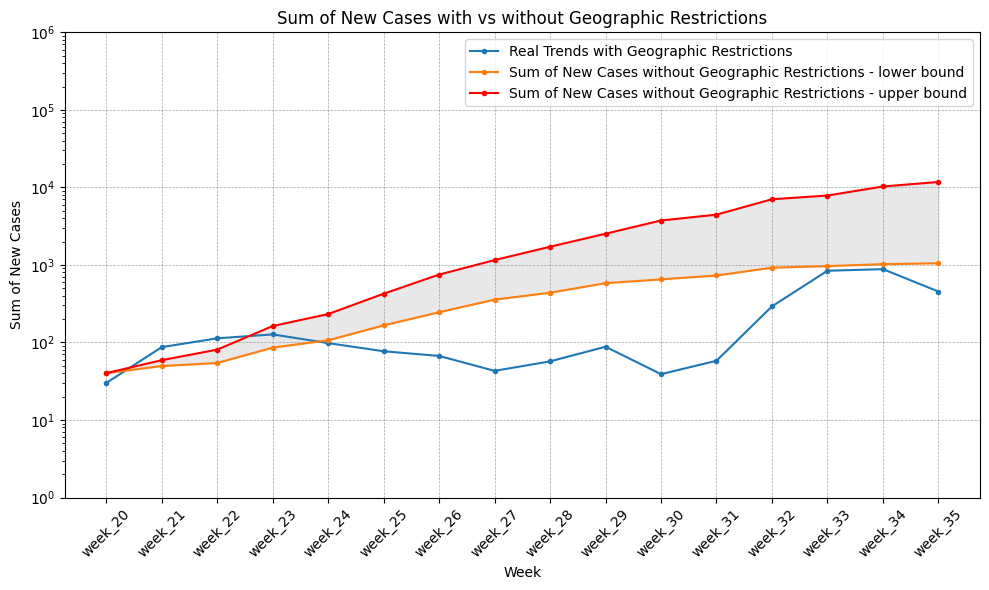

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Your existing plotting code
plt.figure(figsize=(10, 6))
# plt.plot(df['Week'], df['Predicted with Restriction Scenario'], marker='o', markersize=3, linestyle='-', label='Predicted with Restriction Scenario')
plt.plot(df['Week'], df['with Geographic Restrictions'], marker='o', markersize=3, linestyle='-', label='Real Trends with Geographic Restrictions')
# plt.plot(df['Week'], df['Without Geographic Restrictions_Lower Bound1017_20'], marker='o', markersize=3, linestyle='-', label='Sum of New Cases without Geographic Restrictions 1')
plt.plot(df['Week'], df['Without Geographic Restrictions_Lower Bound19'], marker='o', markersize=3, linestyle='-', label='Sum of New Cases without Geographic Restrictions - lower bound')
plt.plot(df['Week'], df['Without Geographic Restrictions_Upper Bound19'], marker='o', markersize=3, linestyle='-', color='red', label='Sum of New Cases without Geographic Restrictions - upper bound')
# plt.plot(df['Week'], df['Midpoint of Without Geographic Restriction'], marker='o', linestyle='-', label='Sum of New Cases without Geographic Restrictions 4')
plt.xlabel('Week')
plt.ylabel('Sum of New Cases')
plt.title('Sum of New Cases with vs without Geographic Restrictions')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.yticks([1, 10, 100, 1000, 10000, 100000, 1000000])  # Set custom y-axis ticks
plt.xticks(rotation=45)
plt.legend()

# Create the grid for vertical lines
plt.grid(True, axis='x', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add horizontal grid lines only at 10^x intervals
ax = plt.gca()
ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10))
ax.grid(True, which='major', axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Fill the area between the lower and upper bounds
plt.fill_between(df['Week'], df['Without Geographic Restrictions_Lower Bound19'], df['Without Geographic Restrictions_Upper Bound19'], color='lightgray', alpha=0.5)
plt.yticks([1, 10, 100, 1000, 10000, 100000, 1000000])  # Set custom y-axis ticks
plt.tight_layout()
plt.show()
